# Import libraries

In [ ]:
# drive access
from google.colab import drive
drive.mount('/content/drive')

# standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the merged csv

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/266/Data/Clean_Data/EmoV_Arctic/merged.csv')

merged_df.head()

,filename,clean_filename,actor,gender,emotion,auto_transcription,label
0,amused_29-45_0042.wav,42,bea,female,amused,HOW COULD HE EXPLAIN HIS POSSESSION OF THE SKETCH,How could he explain his possession of the ske...
1,amused_46-56_0046.wav,46,bea,female,amused,THE GIRL FACED HIM HER EYES SHINING WITH SUDDE...,"The girl faced him, her eyes shining with sudd..."
2,amused_1-15_0005.wav,5,bea,female,amused,WILL WE EVER FORGET IT,Will we ever forget it.
3,amused_281-308_0281.wav,281,bea,female,amused,I DO NOT BLAME YOU FOR ANYTHING REMEMBER THAT,I do not blame you for anything; remember that.
4,amused_225-252_0226.wav,226,bea,female,amused,THAT CAME BEFORE MY A V CS,That came before my A B C's.


In [ ]:
merged_df['gender'].value_counts()

female    5840
male      5580
Name: gender, dtype: int64

In [ ]:
merged_df['emotion'].value_counts()

neutral    6096
sleepy     1720
amused     1317
angry      1268
disgust    1019
Name: emotion, dtype: int64

## Take a look at the label count distribution

In [ ]:
label_counts = merged_df['label'].value_counts().reset_index()
label_counts.columns = ['label','count']

label_counts

,label,count
0,How could he explain his possession of the ske...,22
1,In spite of their absurdity the words affected...,22
2,Her own betrayal of herself was like tonic to ...,22
3,I had faith in them.,22
4,They were three hundred yards apart.,22
...,...,...
1128,They laughed like two happy children.,4
1129,"Besides, had he not whipped the big owl in the...",4
1130,"You're a devil for fighting, and will surely win.",4
1131,"One guess will do, Ernest retorted.",4


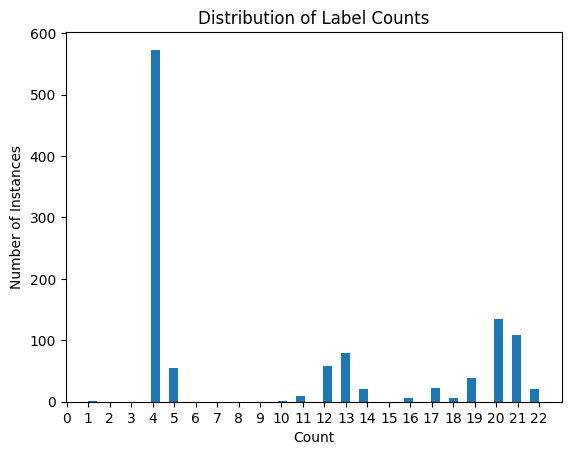

In [ ]:
plt.hist(label_counts['count'], bins=50)
plt.xticks(range(23))
plt.xlabel('Count')
plt.ylabel('Number of Instances')
plt.title('Distribution of Label Counts')

plt.show()

In [ ]:
label_counts.value_counts('count')

count
4     573
20    135
21    109
13     79
12     58
5      55
19     38
17     22
14     20
22     20
11     10
16      6
18      6
1       1
10      1
dtype: int64

## Shuffle the unique labels and assign 20% to test, 80% to train. Confirm the distribution of label counts after the split is still consistent with the overall dataset before the split.



In [ ]:
test_labels = label_counts.sample(frac=0.2, replace=False, random_state=23)
test_labels = test_labels.sort_values(['count','label'])

test_labels

,label,count
660,A bush chief had died a natural death.,4
667,"Again the girls applauded, and Mrs Hall cried.",4
971,All this day Gregson remained in the cabin.,4
837,"Also a fellow Senator, Chauncey Depew, said.",4
624,"Among my minor afflictions, I may mention a ne...",4
...,...,...
112,There was nothing on the rock.,21
101,Was it the rendezvous of those who were strivi...,21
65,What if Jeanne failed him.,21
98,You can take a vacation on pay.,21


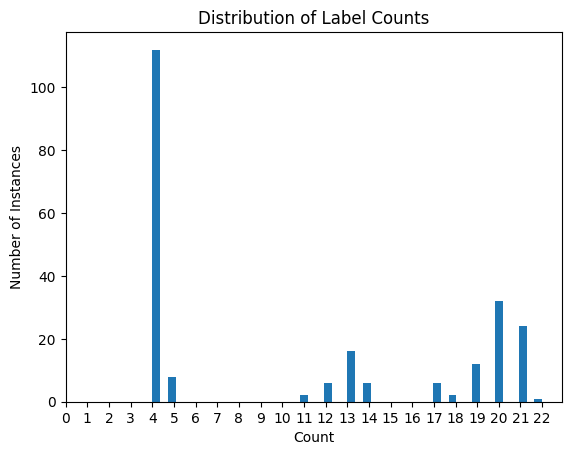

In [ ]:
plt.hist(test_labels['count'], bins=50)
plt.xticks(range(23))
plt.xlabel('Count')
plt.ylabel('Number of Instances')
plt.title('Distribution of Label Counts')

plt.show()

In [ ]:
test_labels.value_counts('count')

count
4     112
20     32
21     24
13     16
19     12
5       8
12      6
14      6
17      6
11      2
18      2
22      1
dtype: int64

In [ ]:
train_labels = label_counts.drop(test_labels.index)
train_labels = train_labels.sort_values(['count','label'])

train_labels

,label,count
1132,It would give me nervous prostration. She said...,1
797,A flying arrow passed between us.,4
1000,"A little before dawn of the day following, the...",4
681,"A little treatment, massage, with some help fr...",4
884,A month in Australia would finish me.,4
...,...,...
7,She turned in at the hotel.,22
15,"The girl faced him, her eyes shining with sudd...",22
17,"The lace was of a delicate ivory color, faintl...",22
4,They were three hundred yards apart.,22


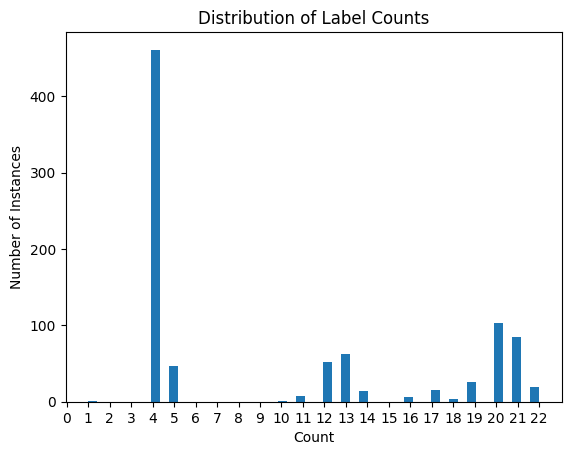

In [ ]:
plt.hist(train_labels['count'], bins=50)
plt.xticks(range(23))
plt.xlabel('Count')
plt.ylabel('Number of Instances')
plt.title('Distribution of Label Counts')

plt.show()

In [ ]:
train_labels.value_counts('count')

count
4     461
20    103
21     85
13     63
12     52
5      47
19     26
22     19
17     16
14     14
11      8
16      6
18      4
1       1
10      1
dtype: int64

# Assign rows to test based on test_labels and rows to train based on train_labels

In [ ]:
def assign_split(row):
    if row['label'] in test_labels['label'].values:
        return 'test'
    elif row['label'] in train_labels['label'].values:
        return 'train'

merged_df['split'] = merged_df.apply(assign_split, axis=1)

merged_df.head()

,filename,clean_filename,actor,gender,emotion,auto_transcription,label,split
0,amused_29-45_0042.wav,42,bea,female,amused,HOW COULD HE EXPLAIN HIS POSSESSION OF THE SKETCH,How could he explain his possession of the ske...,train
1,amused_46-56_0046.wav,46,bea,female,amused,THE GIRL FACED HIM HER EYES SHINING WITH SUDDE...,"The girl faced him, her eyes shining with sudd...",train
2,amused_1-15_0005.wav,5,bea,female,amused,WILL WE EVER FORGET IT,Will we ever forget it.,train
3,amused_281-308_0281.wav,281,bea,female,amused,I DO NOT BLAME YOU FOR ANYTHING REMEMBER THAT,I do not blame you for anything; remember that.,train
4,amused_225-252_0226.wav,226,bea,female,amused,THAT CAME BEFORE MY A V CS,That came before my A B C's.,train


## confirm the same labels as train_labels were assigned to train split

In [ ]:
train_df = merged_df[merged_df['split'] == 'train']

train_df_labels = train_df['label'].value_counts().reset_index()
train_df_labels.columns = ['label','count']
train_df_labels = train_df_labels.sort_values(['count','label'])

train_df_labels

,label,count
905,It would give me nervous prostration. She said...,1
634,A flying arrow passed between us.,4
819,"A little before dawn of the day following, the...",4
490,"A little treatment, massage, with some help fr...",4
716,A month in Australia would finish me.,4
...,...,...
2,She turned in at the hotel.,22
18,"The girl faced him, her eyes shining with sudd...",22
16,"The lace was of a delicate ivory color, faintl...",22
8,They were three hundred yards apart.,22


In [ ]:
assert np.array_equal(train_labels['label'].values, train_df_labels['label'].values)

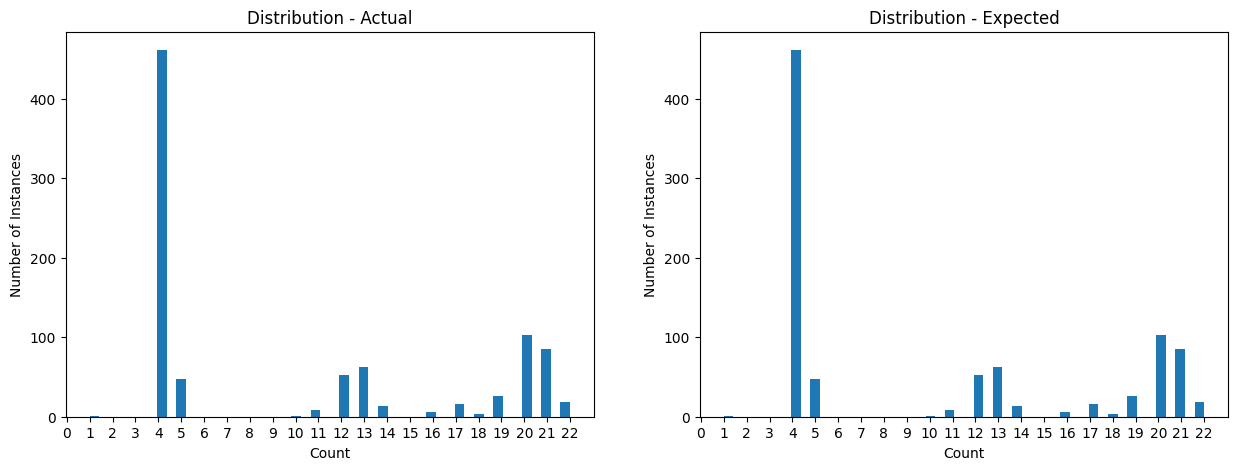

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].hist(train_df_labels['count'], bins=50)
axes[0].set_xticks(range(23))
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Number of Instances')
axes[0].set_title('Distribution - Actual')

axes[1].hist(train_labels['count'], bins=50)
axes[1].set_xticks(range(23))
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Number of Instances')
axes[1].set_title('Distribution - Expected')

plt.show()

## confirm the same labels as test_labels were assigned to test split

In [ ]:
test_df = merged_df[merged_df['split'] == 'test']

test_df_labels = test_df['label'].value_counts().reset_index()
test_df_labels.columns = ['label','count']
test_df_labels = test_df_labels.sort_values(['count','label'])

test_df_labels

,label,count
203,A bush chief had died a natural death.,4
131,"Again the girls applauded, and Mrs Hall cried.",4
189,All this day Gregson remained in the cabin.,4
166,"Also a fellow Senator, Chauncey Depew, said.",4
123,"Among my minor afflictions, I may mention a ne...",4
...,...,...
22,There was nothing on the rock.,21
21,Was it the rendezvous of those who were strivi...,21
20,What if Jeanne failed him.,21
18,You can take a vacation on pay.,21


In [ ]:
assert np.array_equal(test_labels['label'].values, test_df_labels['label'].values)

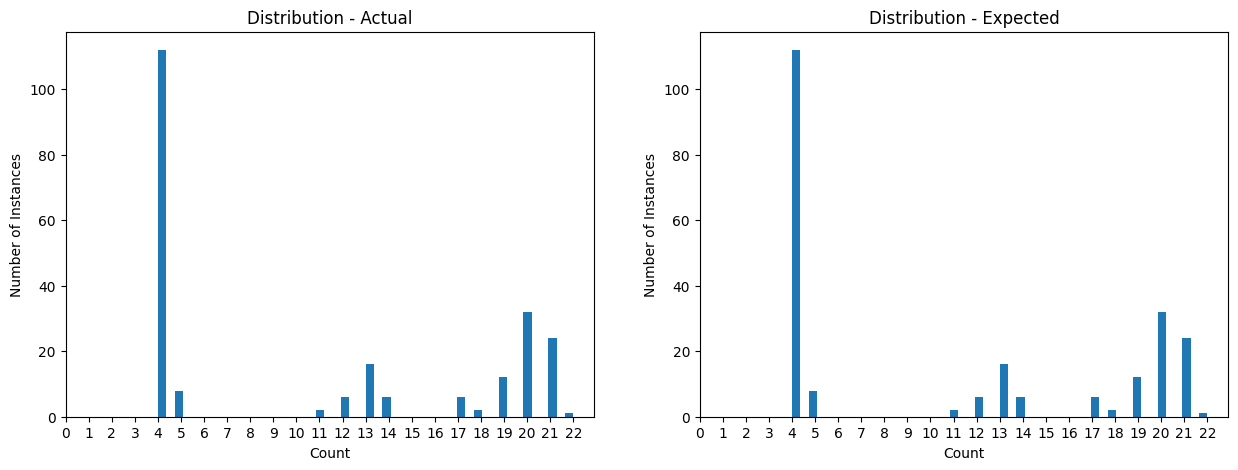

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].hist(test_df_labels['count'], bins=50)
axes[0].set_xticks(range(23))
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Number of Instances')
axes[0].set_title('Distribution - Actual')

axes[1].hist(test_labels['count'], bins=50)
axes[1].set_xticks(range(23))
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Number of Instances')
axes[1].set_title('Distribution - Expected')

plt.show()

In [ ]:
# assert data in test are not in training
is_present = test_df['label'].isin(train_df['label']).any().any()

assert not is_present

# Save train vs test to separate csv for future use

In [ ]:
train_df.drop(columns=['split'], inplace=True)

<ipython-input-35-40ae7d045d3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['split'], inplace=True)


In [ ]:
train_df.head()

,filename,clean_filename,actor,gender,emotion,auto_transcription,label
0,amused_29-45_0042.wav,42,bea,female,amused,HOW COULD HE EXPLAIN HIS POSSESSION OF THE SKETCH,How could he explain his possession of the ske...
1,amused_46-56_0046.wav,46,bea,female,amused,THE GIRL FACED HIM HER EYES SHINING WITH SUDDE...,"The girl faced him, her eyes shining with sudd..."
2,amused_1-15_0005.wav,5,bea,female,amused,WILL WE EVER FORGET IT,Will we ever forget it.
3,amused_281-308_0281.wav,281,bea,female,amused,I DO NOT BLAME YOU FOR ANYTHING REMEMBER THAT,I do not blame you for anything; remember that.
4,amused_225-252_0226.wav,226,bea,female,amused,THAT CAME BEFORE MY A V CS,That came before my A B C's.


In [ ]:
len(train_df)

9014

In [ ]:
train_df['gender'].value_counts()

female    4604
male      4410
Name: gender, dtype: int64

In [ ]:
train_df['emotion'].value_counts()

neutral    4841
sleepy     1355
amused     1031
angry       990
disgust     797
Name: emotion, dtype: int64

In [ ]:
train_df.to_csv('/content/drive/MyDrive/266/Data/Clean_Data/EmoV_Arctic/train.csv', index=False)

In [ ]:
test_df.drop(columns=['split'], inplace=True)

<ipython-input-41-1fd9ff9bb744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['split'], inplace=True)


In [ ]:
test_df.head()

,filename,clean_filename,actor,gender,emotion,auto_transcription,label
8,amused_141_168_0161.wav,161,bea,female,amused,TAKE AWAY THEIR FOUR MEN AND THEY WOULDN'T BE ...,Take away their foreman and they wouldn't be w...
10,amused_169-196_0179.wav,179,bea,female,amused,TO MORROW I'M GOING AFTER THAT BEAR HE SAID,"Tomorrow I'm going after that bear, he said."
13,amused_141_168_0141.wav,141,bea,female,amused,IT SEEMS LIKE A STRANGE POINTING OF THE HAND O...,It seems like a strange pointing of the hand o...
17,amused_196-224_0217.wav,217,bea,female,amused,OPPRESSIVE AS THE HEAT HAD BEEN IT WAS NOW EVE...,"Oppressive as the heat had been, it was now ev..."
22,amused_16-28_0021.wav,21,bea,female,amused,IT FAIRLY CLOVED ME INTO RECOGNIZING IT,It fairly clubbed me into recognizing it.


In [ ]:
len(test_df)

2406

In [ ]:
test_df['gender'].value_counts()

female    1236
male      1170
Name: gender, dtype: int64

In [ ]:
test_df['emotion'].value_counts()

neutral    1255
sleepy      365
amused      286
angry       278
disgust     222
Name: emotion, dtype: int64

In [ ]:
test_df.to_csv('/content/drive/MyDrive/266/Data/Clean_Data/EmoV_Arctic/test.csv', index=False)